***Reference:***

***Ganegedara, Thushan. Natural Language Processing with TensorFlow: The definitive NLP book to implement the most sought-after machine learning models and tasks, 2nd Edition. Packt Publishing.***

# Chapter 2: Introduction to TensorFlow

## Imports

In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K

# Making sure we have the correct TF version
print(f"TensorFlow version => {tf.__version__}")

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except Exception as ex:        
#         print("Couldn't set memory_growth")
#         pass
    
import numpy as np
import os
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

TensorFlow version => 2.10.1


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Using `@tf.function`

Creating a simple function to calculate: $$h = sigmoid(W \cdot x + b)$$ where $W$ and $x$ are matrices and $b$ is a vector. $$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

In [5]:
@tf.function
def layer(x, W, b):
    # Building a graph
    h = tf.nn.sigmoid(tf.matmul(x, W) + b) # Operation to perform
    return h

- `@tf.function` is a [decorator](https://youtu.be/FsAPt_9Bf3U).

    - In simple words, a Python decorator is just another function. Whenever `layer()` function is called, `tf.function()` is called.

    - When the `layer()` function is passing through `tf.function()`, TensorFlow will trace the content (in other words, the operations and data) in the function and build a **computational graph** automatically. 

    - The computational graph (also known as the dataflow graph) builds a **DAG (a directed acyclic graph)** that shows what kind of inputs are required, and what sort of computations need to be done in the program. The feature that builds this computational graph automatically in tensorflow is known as **AutoGraph**.

- [The purpose of using `@tf.function` is to have better performance](https://www.tensorflow.org/guide/function).

- In above example, the `layer()` function produces `h` using `x, W, b` with some operations such as `+` and `tf.matmul()`:
<div align="center">
    <img src="images/DAG.png"/>
</div>    

In [6]:
x = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]], dtype=np.float32) 

# Variable
init_w = tf.initializers.RandomUniform(minval=-0.1, maxval=0.1)(shape=[10,5])
W = tf.Variable(init_w, dtype=tf.float32, name='W') 

# Variable
init_b = tf.initializers.RandomUniform()(shape=[5])
b = tf.Variable(init_b, dtype=tf.float32, name='b') 

h = layer(x,W,b)
print(f"h = {h}")

h = [[0.51644903 0.50727916 0.4990346  0.47398546 0.49519628]]


In [9]:
x.shape, W.shape, b.shape 

((1, 10), TensorShape([10, 5]), TensorShape([5]))

In [10]:
type(W), type(h), type(init_w)

(tensorflow.python.ops.resource_variable_ops.ResourceVariable,
 tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

As you can already see, defining a TensorFlow computational graph and executing that is very “Pythonic”. This is because TensorFlow executes its operations “eagerly”, or immediately after the layer() function is called. This is a special mode in TensorFlow known as eager execution mode. This was an optional mode for TensorFlow 1, but has been made the default in TensorFlow 2.

### What happens when you call a function decorated by `tf.function()` ?

**It first builds a dataflow graph and executes it.**

For e.g. in sigmoid case, the graph look like this:

<div align="center">
    <img src="images/DAG.png"/>
</div>   

A single element or vertex of the graph is called a **node**. There are two main types of objects in this graph: **operations and tensors**. In the preceding example, `tf.nn.sigmoid` is an operation and `h` is a tensor.

## 2. `tf.data` API

In [11]:
import tensorflow as tf
import numpy as np

In [14]:
filenames = [f"data/iris.data.{i}" for i in range(1,4)]
filenames

['data/iris.data.1', 'data/iris.data.2', 'data/iris.data.3']

In [33]:
# dataset reader in tf, that takes list of file names and list of respective data-types
dataset = tf.data.experimental.CsvDataset(filenames, [tf.float32, tf.float32, tf.float32, tf.float32, tf.string])

# organise our data into input and labels
dataset = dataset.map(lambda x1,x2,x3,x4,y: (tf.stack([x1,x2,x3,x4]), y))

In [34]:
for i in dataset:
    print(i[0], i[1])
    break

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float32) tf.Tensor(b'Iris-setosa', shape=(), dtype=string)


In [35]:
for i in dataset:
    print(i[0].numpy(), i[1].numpy())
    break

[5.1 3.5 1.4 0.2] b'Iris-setosa'


In [36]:
# iterate through the dataset to check for corrupted items
for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy().decode('ascii')
    if np.min(x) < 0.0:
        print(f"(Corrupted) X => {x}\tY => {y}")

(Corrupted) X => [ 5.8 -4.   1.2  0.2]	Y => Iris-setosa
(Corrupted) X => [ 4.6  3.6 -1.   0.2]	Y => Iris-setosa
(Corrupted) X => [ 4.7 -3.2  1.6  0.2]	Y => Iris-setosa
(Corrupted) X => [-5.   3.5  1.3  0.3]	Y => Iris-setosa
(Corrupted) X => [-5.1  3.8  1.6  0.2]	Y => Iris-setosa
(Corrupted) X => [ 6.9 -3.1  4.9  1.5]	Y => Iris-versicolor
(Corrupted) X => [-5.2  2.7  3.9  1.4]	Y => Iris-versicolor
(Corrupted) X => [ 5.8  2.7  4.1 -1. ]	Y => Iris-versicolor
(Corrupted) X => [ 6.1 -2.8  4.7  1.2]	Y => Iris-versicolor
(Corrupted) X => [ 5.4  3.  -4.5  1.5]	Y => Iris-versicolor
(Corrupted) X => [ 7.1 -3.   5.9  2.1]	Y => Iris-virginica
(Corrupted) X => [ 5.7  2.5  5.  -2. ]	Y => Iris-virginica
(Corrupted) X => [-6.   2.2  5.   1.5]	Y => Iris-virginica
(Corrupted) X => [ 7.2 -3.2  6.   1.8]	Y => Iris-virginica
(Corrupted) X => [ 6.1  2.6  5.6 -1.4]	Y => Iris-virginica


### Filtering all the corrupted rows
Here we will use the `dataset.filter()` function to filter out any corrupted inputs

In [37]:
dataset = dataset.filter(lambda x,y: tf.reduce_min(x)>0)

In [38]:
# Iterating the dataset
no_corrupt = True
for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy()
    if np.any(x<0.0):
        print("Aha! Detected a corrupted item: ", next_element[0].numpy())
        no_corrupt = False

if no_corrupt:
    print("No corrupted items detected")

No corrupted items detected


### Iterating the dataset in batches
One of the most common behaviors when training a model is to iterate through the dataset in batches, while training or predicting using a model. The `dataset.batch()` function provides a convenient way to do so. Here you can see that we are using a `batch_size` of `5` and getting 5 rows of data at a time during iterations.

In [39]:
batch_size = 5
dataset = dataset.batch(batch_size=batch_size)

for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy()
    print(f"x.shape = {x.shape}, y.shape = {y.shape}")

x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (5, 4), y.shape = (5,)
x.shape = (1, 4), y.shape = (1,)


### Converting class labels to class IDs
You have seen that, `y` here in fact is a `string`. However we need to convert this to a class ID (or an Integer) in order to use `y` to train a model. **For that you can create a lookup table using the `tf.lookup.StaticVocabularyTable` object.**

In [40]:
# The filename queue
filenames = [f"data/iris.data.{i}" for i in range(1,4)]

# Defining a dataset object that accepts CSV type data
dataset = tf.data.experimental.CsvDataset(
    filenames, [tf.float32, tf.float32, tf.float32, tf.float32, tf.string])

# X will be the first 4 columns in the CSV file
x_dataset = dataset.map(lambda x1,x2,x3,x4,y: (x1,x2,x3,x4))

# Converting the string label to an integer
table = tf.lookup.StaticVocabularyTable(
    tf.lookup.KeyValueTensorInitializer(
        [b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'],
        tf.constant([0,1,2], dtype=tf.int64)),
    num_oov_buckets=1
)

# Creating the Y dataset as class labels
y_dataset = dataset.map(lambda x1,x2,x3,x4,y: table.lookup(y))

# Combining the X and Y datasets
dataset = dataset.zip((x_dataset,y_dataset))
# Columns of x are shown as a list of tensors, 
# instead we would like to have a single tensor with all columns
dataset = dataset.map(lambda x,y: (tf.stack(x),y))

for next_element in dataset:
    x, y = next_element[0].numpy(), next_element[1].numpy()
    if np.min(x)<0.0:
        print(f"(corrupted) X => {x}\tY => {y}")

(corrupted) X => [ 5.8 -4.   1.2  0.2]	Y => 0
(corrupted) X => [ 4.6  3.6 -1.   0.2]	Y => 0
(corrupted) X => [ 4.7 -3.2  1.6  0.2]	Y => 0
(corrupted) X => [-5.   3.5  1.3  0.3]	Y => 0
(corrupted) X => [-5.1  3.8  1.6  0.2]	Y => 0
(corrupted) X => [ 6.9 -3.1  4.9  1.5]	Y => 1
(corrupted) X => [-5.2  2.7  3.9  1.4]	Y => 1
(corrupted) X => [ 5.8  2.7  4.1 -1. ]	Y => 1
(corrupted) X => [ 6.1 -2.8  4.7  1.2]	Y => 1
(corrupted) X => [ 5.4  3.  -4.5  1.5]	Y => 1
(corrupted) X => [ 7.1 -3.   5.9  2.1]	Y => 2
(corrupted) X => [ 5.7  2.5  5.  -2. ]	Y => 2
(corrupted) X => [-6.   2.2  5.   1.5]	Y => 2
(corrupted) X => [ 7.2 -3.2  6.   1.8]	Y => 2
(corrupted) X => [ 6.1  2.6  5.6 -1.4]	Y => 2


## 3. Operations in Tensorflow

### 3.1 Comparison Operators

In [3]:
x = tf.constant([[1,2],[3,4]], dtype=tf.int32) # 2D-tensor
y = tf.constant([[4,3],[3,2]])

In [6]:
x, y

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[4, 3],
        [3, 2]])>)

In [9]:
# Checks if two tensors are equal element-wise and returns a boolean tensor
# x_equal_y => [[False,False],[True,False]]
x_equal_y = tf.equal(x, y, name=None) 

# Checks if x is less than y element-wise and returns a boolean tensor
# x_less_y => [[True,True],[True,False]]
x_less_y = tf.less(x, y, name=None) 

# Checks if x is greater or equal than y element-wise and returns a boolean tensor
# x_great_equal_y => [[False,False],[True,True]]
x_great_equal_y = tf.greater_equal(x, y, name=None) 


print('Is X == Y (element-wise)?')
print(x_equal_y.numpy())

print('\nIs X < Y (element-wise)?')
print(x_less_y.numpy())

print('\nIs X >= Y (element-wise)?')
print(x_great_equal_y.numpy())

Is X == Y (element-wise)?
[[False False]
 [ True False]]

Is X < Y (element-wise)?
[[ True  True]
 [False False]]

Is X >= Y (element-wise)?
[[False False]
 [ True  True]]


In [13]:
# Selects elements from x and y depending on whether,
# the condition is satisfied (select elements from x)
# or the condition failed (select elements from y)
condition = tf.constant([[True,False],[True,False]],dtype=tf.bool)
# x_cond_y => [[1,3],[3,2]]
x_cond_y = tf.where(condition, x, y, name=None) 

print("x:", x, "y:", y, "\n")
print('X or Y depending on the condition (element-wise)')
print(x_cond_y.numpy())

x: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) y: tf.Tensor(
[[4 3]
 [3 2]], shape=(2, 2), dtype=int32) 

X or Y depending on the condition (element-wise)
[[1 3]
 [3 2]]


### 3.2 Mathematical Operations

In [19]:
x = tf.constant([[1,2],[3,4]], dtype=tf.float32)
y = tf.constant([[4,3],[3,2]], dtype=tf.float32)

# Add two tensors x and y in an element-wise fashion
# x_add_y => [[5,5],[6,6]]
x_add_y_1 = tf.add(x, y)
x_add_y_2 = x + y

# Performs matrix multiplication (not element-wise)
# x_mul_y => [[10,7],[24,17]]
x_mul_y = tf.matmul(x, y) 

# Compute natural logarithm of x element-wise
# equivalent to computing ln(x)
ln_x = tf.math.log(x) # natural log

# Performs reduction operation across the specified axis
# x_sum_1 => [3,7]
x_sum_1 = tf.reduce_sum(x, axis=1, keepdims=False) # column-wise

# x_sum_2 => [[4],[6]]
x_sum_2 = tf.reduce_sum(x, axis=[0]) # row-wise


print('X + Y')
print(x_add_y_1.numpy())
print('\n XY')
print(x_mul_y.numpy())
print('\n log(x)')
print(ln_x.numpy())
print('\n X sum over axis 1')
print(x_sum_1.numpy())
print('\n X sum over axis 0')
print(x_sum_2.numpy())

X + Y
[[5. 5.]
 [6. 6.]]

 XY
[[10.  7.]
 [24. 17.]]

 log(x)
[[0.        0.6931472]
 [1.0986123 1.3862944]]

 X sum over axis 1
[3. 7.]

 X sum over axis 0
[4. 6.]


In [23]:
# Segments the tensor according to segment_ids (items with same id in
# the same segment) and computes a segmented sum of the data

data = tf.constant(np.arange(1,11))
data

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])>

In [25]:
segment_ids = tf.constant([0,0,0,1,1,2,2,2,2,2 ], dtype=tf.int32)

# x_seg_sum => [6,9,40]
x_seg_sum = tf.math.segment_sum(data, segment_ids)

print('Segemented sum of a vector')
print(x_seg_sum.numpy())

# it's basically:
# [ 1+2+3],  [4+5],  [6+7+8+9+10] ]

Segemented sum of a vector
[ 6  9 40]


### 3.3 Scatter Operation 

Scatter operation refers to using indexing or slicing to change the values in a tensor.

In [32]:
v = tf.Variable(tf.constant([[1,9],[3,10],[5,11]], dtype=tf.float32), name='ref')

print("v:\n%s"%v.numpy())

# Changing the 0th row in v
v[0].assign([-1,-9])
print('\nref (after changing row=0)\n', v.numpy())

v = tf.Variable(tf.constant([[1,9],[3,10],[5,11]],dtype=tf.float32),name='ref')
# Changing the value at 1st row, 1st column in v
v[1,1].assign(-10)
print('\nref (after changing row=1, col=1)\n', v.numpy())

v = tf.Variable(tf.constant([[1,9],[3,10],[5,11]],dtype=tf.float32),name='ref')
# Changing the values of rows starting from 1st to end in 0th column of v
v[1:,0].assign([-3,-5])
print('\nref (after changing row=1:, col=0)\n', v.numpy())

v:
[[ 1.  9.]
 [ 3. 10.]
 [ 5. 11.]]

ref (after changing row=0)
 [[-1. -9.]
 [ 3. 10.]
 [ 5. 11.]]

ref (after changing row=1, col=1)
 [[  1.   9.]
 [  3. -10.]
 [  5.  11.]]

ref (after changing row=1:, col=0)
 [[ 1.  9.]
 [-3. 10.]
 [-5. 11.]]


### 3.4 Gather Operation
Gather operation refers to using indexing or slicing to retrieve values in a tensor.

In [35]:
t = tf.constant([[1,9],[3,10],[5,11]],dtype=tf.float32)

print("t:\n%s\n"%t.numpy())

# Getting the 0th row in v
print('t[0] =',t[0].numpy())

# Getting the value at 1st row, 1st column in v
print('t[1,1] =',t[1,1].numpy())

# Getting the values of rows starting from 1st to end in 0th column of v
print('t[1:,0] =',t[1:,0].numpy())

t:
[[ 1.  9.]
 [ 3. 10.]
 [ 5. 11.]]

t[0] = [1. 9.]
t[1,1] = 10.0
t[1:,0] = [3. 5.]


> **Note:** `tf.Tensor`/`tf.EagerTensor` are **immutable** objects.

## 4. Neural Network Related Operations

### 4.1 Non-Linear Activations in NNs 

- Typically there is a non-linear activation/transformation(i.e. activation layer) after each layer o/p in a neural network(NN), except the last layer. This helps NN to learn complex pattern(often non-linear) in real world data.

- Without non-linear activation layers, a DNN would be a bunch of linear layers stacked together, which can be compressed to a single big linear layer. 

- In conclusion, if not for the nonlinear activations, we cannot create a neural network with more than one layer.

- E.g.:

    1. Above sigmoid example without b can be written as: `h = sigmoid(W*x)`
    
    2. assume we have 3 layers(having weights `W1`,`W2`,`W3`) where each layer does the preceding computation; the full computation can be summarized as:
    `h = sigmoid(W3*sigmoid(W2*sigmoid(W1*x)))`
    
    3. however, if we remove the non-linear activation, we get this:
    `h = (W3 *   (W2 *   (W1 * x))) = (W3*W2*W2*x)`
    
    4. So, without the nonlinear activations, the three layers can be brought down to a single linear layer.

- Two common non-linear activation function:
    - **Sigmoid:** `tf.nn.sigmoid(x, name=None)`
    - **ReLU:** `tf.nn.relu(x, name=None)`

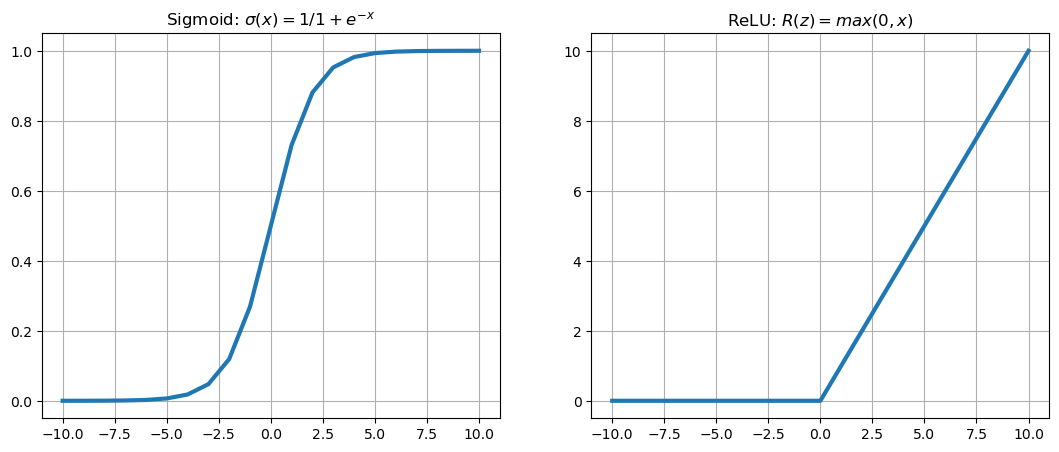

In [69]:
x = tf.constant(np.arange(-10,11), dtype=tf.float32)

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x, tf.nn.sigmoid(x), linewidth=3)
plt.grid()
plt.title("Sigmoid: $\sigma(x) = 1/{1 + e^{-x}}$")

# plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(x, tf.nn.relu(x), linewidth=3)
plt.grid(which='both')
plt.title("ReLU: $R(z) = max(0,x)$")

plt.show();

### 4.2 Convulational Operation

- A convolution operation is a widely used *signal-processing technique*. 
    - *Signal processing involves converting or transforming data in a way that allows us to see things in it that are not possible via direct observation.*<br></br>
    
- For images, convolution is used for different effects(blurring, sharpening, embossing), or extract features(such as edge detection) from an image. An example of edge detection using convolution:
    
<div align="center">
    <img src="images/edge_detection_conv.png"/>
</div>  

- This is achieved by shifting a convolution filter on top of an image to produce a different output at each location. Specifically, at each location, we do element-wise multiplication of the elements in the convolution filter with the image patch (the same size as the convolution filter) that overlaps with the convolution filter and takes the sum of the multiplication.


Below fig. represents the above process described
<!-- <div align="center">
    <img src="images/2D_Convolution_Animation.gif"/>
</div>   -->

#### 4.2.1 2D Convulational and 2D Max Pooling

2D Convolution and Max pooling are two operation you perform on a tensor over the width and height axes. These operations are often used in convolution neural networks.

- **Convolution operation**
<div align="center">
    <img src="images/conv.png" title="Convolution operation"/>
</div>  

* **

- **Max pool operation**
<div align="center">
    <img src="images/max_pool.png" title="Max pool operation"/>
</div>  

- [Kernel_(image_processing) - Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing))

- [tensorflow doc - conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

    - Example is good

#### 4.2.2 `tf.conv2d()`

Let's understand all the arguments in `tf.conv2d(input, filters, strides, padding)` in more detail:

In [12]:
# Implementing Convulation Operation
x = tf.constant(
    [[
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    ]],
    dtype=tf.float32)

x_filter = tf.constant(
    [
        [
            [[0.5]],[[1]]
        ],
        [
            [[0.5]],[[1]]
        ]
    ],
    dtype=tf.float32)

x_stride = [1,1,1,1]
x_padding = 'VALID'


print("x:\n%s" %x.shape)
print("x_filter:\n%s" %x_filter.shape)

x:
(1, 4, 4, 1)
x_filter:
(2, 2, 1, 1)


- Very Nice Visualization: [**How to interpret a rank-4 tensor? - Tensorflow Docs**](https://www.tensorflow.org/guide/tensor#about_shapes)

In [ ]:
x_conv = tf.nn.conv2d(input=x, filters=x_filter, 
                      strides=x_stride, padding=x_padding)

print('2-D Convolution operation')
print(x_conv.numpy())

- **`input` :** This is typically a 4D tensor where dimensions should be ordered as `[batch_size, height, width, channels]` or `[batch_size, height, width, features]`

    - `batch_size`: This is the amount of data (for e.g., inputs such as images, and words) in a single batch of data.
    
    - `height and width`: This is the height and the width of the input.
    
    - `channels`: This is the depth of an input (for e.g., for an RGB image, the number of channels will be 3—a channel for each color).

In [8]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print("A rank-4 tensor, shape: %s"%rank_4_tensor.shape)

A rank-4 tensor, shape: (3, 2, 4, 5)


<div align="center">
    <img src="images/rank_4_tensor.png"/>
</div>

In [9]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


But note that the `Tensor.ndim` and `Tensor.shape` attributes don't return `Tensor` objects. If you need a `Tensor` use the `tf.rank` or `tf.shape` function. This difference is subtle.

In [10]:
tf.rank(rank_4_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [11]:
tf.shape(rank_4_tensor)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([3, 2, 4, 5])>

While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

<div align="center">
    <img src="images/rank_4_tensor_1.png"/>
</div>

2. **`filters` :** This is a 4D tensor that represents the convulation window of the convulational operation. The filter dimensions should be `[height, width, in channels, out channels]`:
    - `height and width`: This is the height and the width of the filter (often smaller than that of the input)
    
    - `in_channels`: This is the number of channels of the input to the layer
    
    - `out_channels`: This is the number of channels to be produced in the output of the layer <br></br>
    
3. `strides`: This is a list with four elements, where the elements are `[batch _ stride, he ight _ stride , width stride, channels stride]`. **The `strides` argument denotes how many elements to skip during a single shift of the convolution window on the input.** Usually, you don't have to worry about `batch_stride` and `channels_stride`. If you do not completely understand what `strides` is, you can use the default value of `1`.

4. `padding`: This can be one of `['SAME', 'VALID']`. It decides how to handle the convolution operation near the boundaries of the input. 

    - The `VALID` operation performs the convolution without padding. If we were to convolve an input of n length with a convolution window of size h, this will result in an output of size $(n-h+l < n)$. The diminishing of the output size can severely limit the depth of neural networks. 
    
    - `SAME` pads zeros to the boundary such that the output will have the same height and width as the input.
    
- **Convolution operation**
<div align="center">
    <img src="images/conv.png" title="Convolution operation"/>
</div> 

#### 4.2.3 The Pooling Operation

In [6]:
x = tf.constant(
    [[
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    ]],
    dtype=tf.float32)

x_ksize = [1,2,2,1]
x_stride = [1,2,2,1]
x_padding = 'VALID'

x_pool = tf.nn.max_pool2d(
    input=x, ksize=x_ksize,
    strides=x_stride, padding=x_padding
)

print("x:\n%s" %x.numpy())

print('\nMax pooling operation')
print(x_pool.numpy())

x:
[[[[1.]
   [2.]
   [3.]
   [4.]]

  [[4.]
   [3.]
   [2.]
   [1.]]

  [[5.]
   [6.]
   [7.]
   [8.]]

  [[8.]
   [7.]
   [6.]
   [5.]]]]

Max pooling operation
[[[[4.]
   [4.]]

  [[8.]
   [8.]]]]


A pooling operation behaves similarly to the convolution operation, but the final output is different. Instead of outputting the sum of the element-wise multiplication of the filter and the image patch, we now take the maximum
element of the image patch for that location.

- **Max pool operation**
<div align="center">
    <img src="images/max_pool.png" title="Max pool operation"/>
</div>  

### 4.3 Loss Function

1. $MSE = \frac{1}{N}\sum_{i=1}^{N}(x_i - \hat{x}_i)^2  \rightarrow $ `tf.nn.l2_loss`

2. $\text{Cross Entropy Loss(CE) } = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) \rightarrow $ `tf.nn.softmax_cross_entropy_with_logits` for classification tasks. And by `logits` here, we mean the unnormalized output of the neural network (that is, the linear output of the last layer of the neural network).

In [13]:
# Returns half of L2 norm of t given by sum(t**2)/2
x = tf.constant([[2,4],[6,8]],dtype=tf.float32)
x_hat = tf.constant([[1,2],[3,4]],dtype=tf.float32)
# MSE = (1**2 + 2**2 + 3**2 + 4**2)/2 = 15
MSE = tf.nn.l2_loss(x-x_hat)

# A common loss function used in neural networks to optimize the network
# Calculating the cross_entropy with logits (unnormalized outputs of the last layer)
# instead of probabilsitic outputs leads to better numerical stabilities

y = tf.constant([[1,0],[0,1]],dtype=tf.float32)
y_hat = tf.constant([[3,1],[2,5]],dtype=tf.float32)

# This function alone doesnt average the cross entropy losses of all data points,
# You need to do that manually using reduce_mean function
CE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=y))

print('MSE Loss: ',MSE.numpy())
print('CE Loss: ',CE.numpy())

MSE Loss:  15.0
CE Loss:  0.08775769


### 4.4 Stochastic Optimization

Here we discuss how to implement optimization with TensorFlow. The objective of this example is to find the mininum point of a given function. For this example, we will use a simple quadratic function where $y = x^2$. We will start at an arbitrary point (say $x=2$) and keep minimizing until we reach the minimum.

Step:  0 , x:  1.600000023841858 , y:  4.0
Step:  1 , x:  1.2799999713897705 , y:  2.56000018119812
Step:  2 , x:  1.0239999294281006 , y:  1.6383999586105347
Step:  3 , x:  0.8191999197006226 , y:  1.0485758781433105
Step:  4 , x:  0.6553599238395691 , y:  0.6710885167121887


Text(0.5, 1.0, 'Optimizing $y = x^2$')

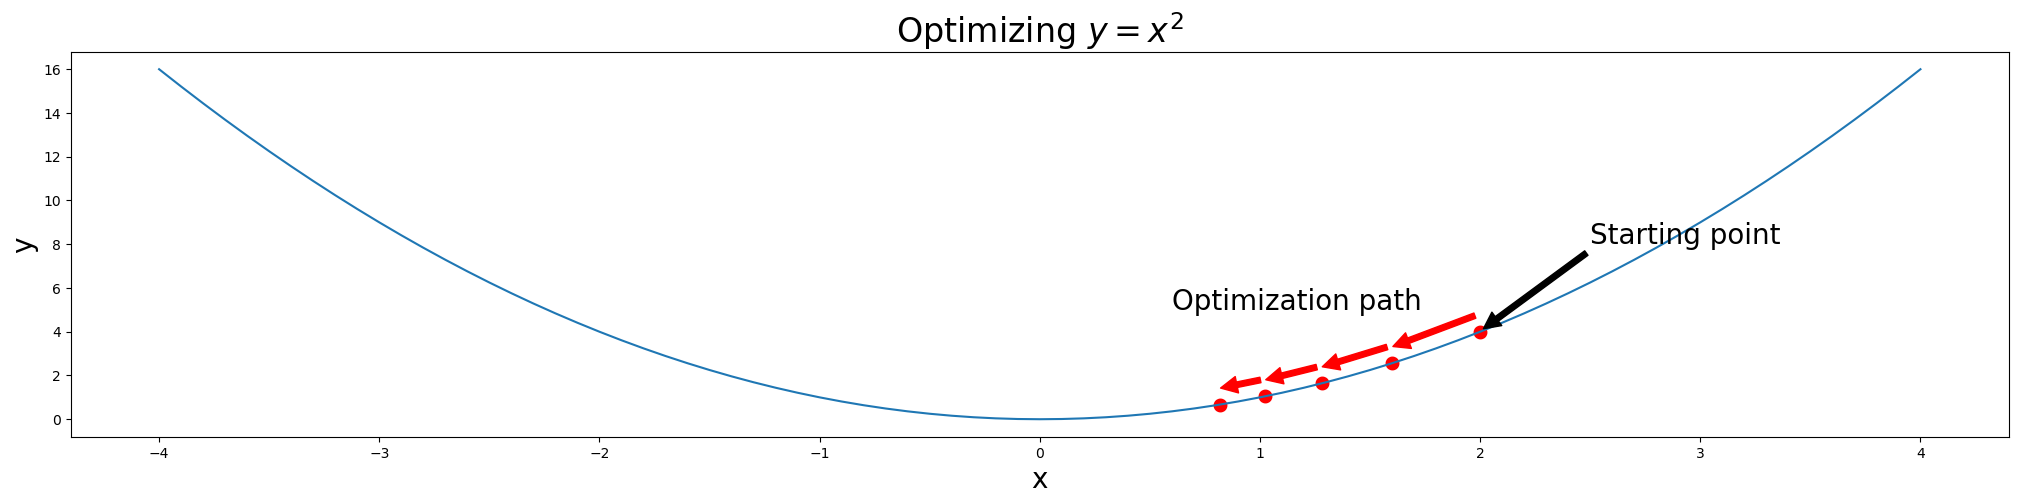

In [16]:
# Optimizers play the role of tuning neural network parameters so that their task error is minimal
# For example task error can be the cross_entropy error for a classification task
tf_x = tf.Variable(tf.constant(2.0,dtype=tf.float32),name='x') 
optimizer = tf.optimizers.SGD(learning_rate=0.1)

# Optimizing tf_x using gradient tape
x_series, y_series = [],[]
for step in range(5):    
    x_series.append(tf_x.numpy().item())
    with tf.GradientTape() as tape:
        tf_y = tf_x**2
        
    gradients = tape.gradient(tf_y, tf_x)
    optimizer.apply_gradients(zip([gradients], [tf_x]))
    print('Step: ',step, ', x: ',tf_x.numpy().item(), ', y: ',tf_y.numpy().item())
    
    y_series.append(tf_y.numpy().item())

# Plotting the graph
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=25,h=5)
ax.plot(np.arange(-4,4.1,0.1),np.arange(-4,4.1,0.1)**2)
ax.scatter(x_series,y_series,c='red',linewidths=4)

x_offset, y_offset = 0.02, 0.75
ax.annotate('Starting point', xy=(2.01, 4.1), xytext=(2.5, 8),
            arrowprops=dict(facecolor='black', shrink=0.01),fontsize=20
            )

ax.annotate('Optimization path', xy=(2.01, 4.1), xytext=(0.6, 5),
            arrowprops=None,fontsize=20
            )

for index,(x,y) in enumerate(zip(x_series,y_series)):
    if index == len(x_series)-1:
        break
    ax.annotate('', xy=(x_series[index+1], y_series[index+1]+y_offset), xytext=( x - x_offset, y + y_offset),
                arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.01),fontsize=20
                )

ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Optimizing $y = x^2$',fontsize=24)
# fig.savefig('optimization.png')

## 5. Keras APIs

Keras's primary focus is model building. For that, Keras provides several different APIs with varying degrees of flexibility and complexity. Choosing the right API for the job will require sound knowledge of the limitations of each API as well as experience. 

The APIs provided by Keras are:
- **Sequential API** — The most easy-to-use API. In this API, you simply stack layers on top of each other to create a model.

- **Functional API** — The functional API provides more flexibility by allowing you to define custom models that can have multiple input layers/multiple output layers.

- **Sub-classing API** — The sub-classing API enables you to define custom reusable layers/models as Python classes. This is the most flexible API, but it requires strong familiarity with the API and raw TensorFlow operations to use it correctly.


Here, we will briefly go through what the code looks like, using different APIs to develop models. You are not expected to fully understand the code below. Rather, focus on the code style to spot any differences between the three methods.

### **Sequential API**

In [17]:
K.clear_session()

model = tf.keras.Sequential([
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

### **Functional API**

In [18]:
K.clear_session()

inp = tf.keras.layers.Input(shape=(784,))
out_1 = tf.keras.layers.Dense(500, activation='relu')(inp)
out_2 = tf.keras.layers.Dense(250, activation='relu')(out_1)
out = tf.keras.layers.Dense(10, activation='softmax')(out_2)

model = tf.keras.models.Model(inputs=inp, outputs=out)

### **Sub-classing API**

With sub-classing API, you define your model as a python object that inherits from the base object, `tf.keras.Model`. 
When using sub-classing you need to define 2 imp. functions: 
- `__init__()`, which will specify any special params, layers, and so on required to successfully perform the computations, and 

- `call()`, which will define the computations that need to happen in the model

In [20]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes):
        super().__init__()
        self.hidden1_layer = tf.keras.layers.Dense(500, activation='relu')
        self.hidden2_layer = tf.keras.layers.Dense(250, activation='relu')
        self.final_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    def call(self, inputs):
        h = self.hidden1_layer(inputs)
        h = self.hidden2_layer(h)
        y = self.final_layer(h)
        return y
    
model = MyModel(num_classes=10)

Here, you can see that our model has three layers, just like all the previous models we defined. Next, the call function defines how these layers connect to produce the final output. The sub-classing API is considered the most diffcult to master, mainly due to the freedom allowed by the method. However, the rewards are immense once you learn the API as it enables you to define very complex models/layers as unit computations that can be reused later.

## Implemneting our first NN: MNIST Classification

### Get and Prepare the Data

In [28]:
import os

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
                        path=os.path.join(os.getcwd(), "data", "mnist.npz"))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [29]:
x_train[0].shape # A single image

(28, 28)

In [30]:
print(f"(Before) x_train has shape: {x_train.shape}")
print(f"(Before) x_test has shape: {x_test.shape}")

print(f"(Before) x_train has - min: {np.min(x_train)}, max: {np.max(x_train)}")
print(f"(Before) x_test has - min: {np.min(x_test)}, max: {np.max(x_test)}")

# Reshaping our x_train and x_test tensors so that each image
# is represented as 1D-vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(f"\n(After) x_train has shape: {x_train.shape}")
print(f"(After) x_test has shape: {x_test.shape}")

# Standardizing our x_train and x_test tensors, to have Mean=0, and Variance=0
x_train = (x_train - np.mean(x_train, axis=1, keepdims=True))/np.std(x_train, axis=1, keepdims=True)
x_test = (x_test - np.mean(x_test, axis=1, keepdims=True))/np.std(x_test, axis=1, keepdims=True)

print(f"(After) x_train has - min: {np.min(x_train)}, max: {np.max(x_train)}")
print(f"(After) x_test has - min: {np.min(x_test)}, max: {np.max(x_test)}")

(Before) x_train has shape: (60000, 28, 28)
(Before) x_test has shape: (10000, 28, 28)
(Before) x_train has - min: 0, max: 255
(Before) x_test has - min: 0, max: 255

(After) x_train has shape: (60000, 784)
(After) x_test has shape: (10000, 784)
(After) x_train has - min: -0.8508020140306101, max: 7.770145734421186
(After) x_test has - min: -0.731905259880747, max: 7.57798901103678


### Model Training

In [32]:
# Set random seed
tf.keras.random.set_seed(42)

batch_size = 100 # how many datapoints we feed to the model in a single iteration
img_width, img_height = 28,28 # width and height of the images
input_size = img_height * img_width # total number of pixels
num_labels = 10 # number of classes

def mnist_model():
    """
    Defining the model using Keras sequential API 
    """
    model = tf.keras.Sequential([tf.keras.layers.Dense(500, activation="relu"),
                                 tf.keras.layers.Dense(250, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='softmax')])
    
    return model

In [33]:
# Create the model
model = mnist_model()

# Compile the model
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [34]:
""" Model training """    

# Train the model
NUM_EPOCHS = 10

# Creating onehot encoded labels
y_onehot_train = np.zeros((y_train.shape[0], num_labels), dtype=np.float32)
y_onehot_train[np.arange(y_train.shape[0]), y_train] = 1.0

# Training Phase
train_history = model.fit(x_train, y_onehot_train, 
                         batch_size=batch_size, epochs=NUM_EPOCHS,
                         validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 4s 4ms/step - loss: 0.2364 - accuracy: 0.9272 - val_loss: 0.1260 - val_accuracy: 0.9619
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0941 - accuracy: 0.9711 - val_loss: 0.1201 - val_accuracy: 0.9693
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.1272 - val_accuracy: 0.9666
Epoch 4/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.1028 - val_accuracy: 0.9749
Epoch 5/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.1122 - val_accuracy: 0.9764
Epoch 6/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.1057 - val_accuracy: 0.9786
Epoch 7/10
480/480 [==============================] - 2s 3ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.1227 - val_accuracy: 0.9758
Epoch 

### Testing the model

In [35]:
""" Testing phase """

# Test inputs and targets
y_onehot_test = np.zeros((y_test.shape[0], num_labels), dtype=np.float32)
y_onehot_test[np.arange(y_test.shape[0]), y_test] = 1.0

# Evaulte on test data
test_res = model.evaluate(x_test, y_onehot_test, batch_size=batch_size)

print("Testing Results: ")
print(f"\tLoss: {test_res[0]}")
print(f"\tAccuracy: {test_res[1]}")

100/100 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9785
Testing Results: 
	Loss: 0.1516658067703247
	Accuracy: 0.9785000085830688


### Visualizing the Loss and the Accuracy

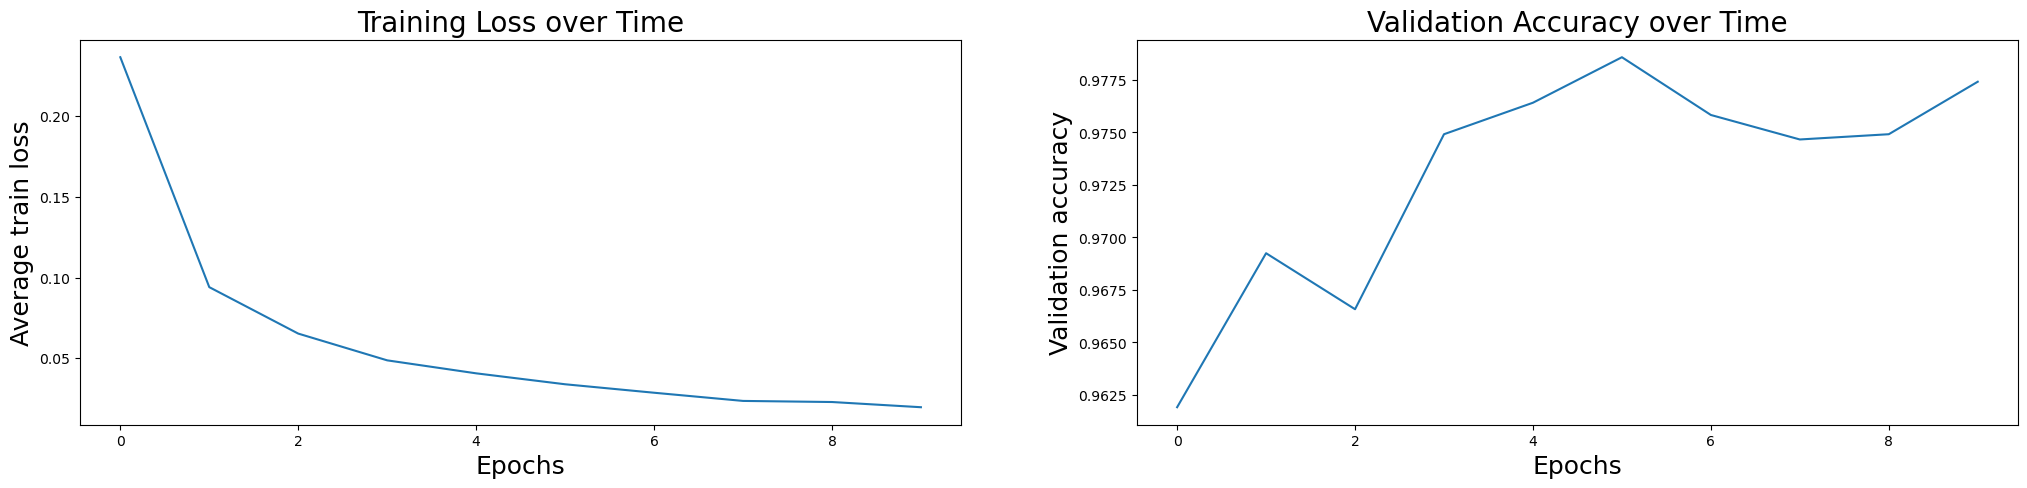

In [38]:
x_axis = np.arange(NUM_EPOCHS)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(w=25,h=5)

ax[0].plot(x_axis, train_history.history["loss"])
ax[0].set_xlabel('Epochs',fontsize=18)
ax[0].set_ylabel('Average train loss',fontsize=18)
ax[0].set_title('Training Loss over Time',fontsize=20)

ax[1].plot(x_axis, train_history.history["val_accuracy"])
ax[1].set_xlabel('Epochs',fontsize=18)
ax[1].set_ylabel('Validation accuracy',fontsize=18)
ax[1].set_title('Validation Accuracy over Time',fontsize=20)

plt.show();